# Materi by Bu Vessa Rizky Oktavia, S.Kom., M.Kom

In [17]:
import numpy as np
import random 
import matplotlib.pyplot as plt

# Mendefinisikan Environtment

In [18]:
#bikin maze representasikan dengan matrix 2d
grid_width = 5
grid_height = 5
start_state = (0,0)
# goal
cheese_state = (4,4)
# representasi lokasi obstacles/penghalang
trap_states = [(1,1), (2,2), (3,3)]

# Mendefinisikan Action

In [19]:
# kalo di game y semakin besar semakin turun jadi y semakin kecil semakin ke atis
actions = [(0,-1), (0,1), (-1,0), (1,0)]
actions_name = ['Up', 'Down', 'Left', 'Right']

In [20]:
len(actions)
random.randint(0,len(actions)-1)

0

## Q Learning membutuhkan Q Values untuk mencatat reward yang diberikan dari action yang dilakukan

In [21]:
# q_table tujuan intinya kita kan melakukan optimasi jadi kita pengen cheese di 4,4 dan kita di 0.0 kan banyak cara buat ke cheese dan menhindari obstacles, nah mana yang menghasilkan paling sedikit action yang dilakukan dengan mendapatkan keju
# karena dengan action yg lebih sedikit program menjadi lebih cepat
# nah untuk mencatat itu kita butuh bantuan q table
q_table = np.zeros((grid_width, grid_height, len(actions)))


In [22]:
print(q_table)

[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]


# MDP
- Dia akan melakukan learning sebanyak berkali kali
- Disaat tikus mendapatkan keju 1x kejadian itu dinamakan satu episode
- Nah kalo ketemu kucing tikusnya mati gak bisa lanjut cari keju ini dinamakan episode tapi endingnya beda
- Misal kalo ambil skenario gini-gini nanti kamu sad ending
- Nah untuk mencari banyak ending pasti dibutuhkan banyak iterasi/ percobaan



- State != Episode
- Kalo state setiap action 
- Kalo Episode menghasilkan Ending

In [23]:
# Hyperparameter
total_episodes = 1000 #representasi total hasil skenario yang diinginkan
max_steps = 100
learning_rate = 0.8
# discount factor itu berpengaruh ke next action/ state semakin besar nilainya semakin berpengaruh
discount_factor = 0.9 #90% action sebelumnya berpengaruh ke action setelahnya
# pada dasarnya sifatnya rl itu greedy, karena ketika dia mengetahui action yang rewardnya gede dia akan greedy ke action itu, nah untuk mempengaruhi pemikiran si agent dalam mengambil action eksplorasi ketimbang iterasi
exploration_prob = 0.2
#exploration prob itu gk boleh terlalu gede, soalnya ntar gak jadi makan kita kebanyakan eksplor :v

In [24]:
# - Episode Reward, kira kira skenario mana sih yang reward yang paling gede
episode_rewards = []

In [25]:
# Function Epsilon Greedy
def choose_action(state):
    # random biar dia belajar sendiri dan berbagai kemungkinan dicoba
    if (random.uniform(0,1)) < exploration_prob:
        return random.randint(0,len(actions)-1)
    else:
        return np.argmax(q_table[state])

In [26]:
# Q Learning
# dia akan melakukan q learning di 1000 episode
for episode in range(total_episodes):
    state = start_state
    done = False
    episode_reward = 0
    # setiap melakukan action dia geser atau gerak, jadi dia ambil 1 state
    for step in range(max_steps):
        # pilih aksi dan catat aksi
        action_index = choose_action(state)
        action = actions[action_index]
        # print(action)
        
        # perbarui state sekarang, karena kita udah bergerak, untuk 
        new_state = (state[0]+action[0], state[1]+action[1])
        # biar gk keluar arena labirin kita
        if 0 <= new_state[0] < grid_width and 0 <= new_state[1] < grid_height:
            # beri kondisi kalo dia sudah mencapai goal
            if new_state == cheese_state:
                reward = 100
                done = True
            # cek juga kondisinya kalo ketemu trap/jevbakan/obstacles
            elif new_state in trap_states:
                reward = -10
                done = True #episode berakhir sedih karena tikus dimakan kucing
            #  bisa aja dia gk ketmu goal maupun obstacle
            else:
                reward = -1 #di buang energi gk boleh lebih dari obstacles
    
            episode_reward += reward

            # RUMUS QLEARNING
            q_table[state][action_index] += learning_rate*(reward+discount_factor*np.max(q_table[new_state]) - q_table[state][action_index])
            state = new_state
        if done:
            break
        
    episode_rewards.append(episode_reward)
    


In [27]:
#Testing
state = start_state
path_x = [state[0]]
path_y = [state[1]]
steps = 0

while state!= cheese_state and steps<max_steps:
    action_index = choose_action(state)
    action = actions[action_index]
    new_state = (state[0]+action[0], state[1]+action[1])

    if 0<=new_state[0]<grid_width and 0<=new_state[1]<grid_height:
        state = new_state
        path_x.append(state[0])
        path_y.append(state[1])
        steps+=1
    else:
        break

if state == cheese_state:
    print("Cheese found!")
else:
    print("Mouse cannot get the cheese :(")

print("Mouse needed : ",steps," steps")


Mouse cannot get the cheese :(
Mouse needed :  10  steps


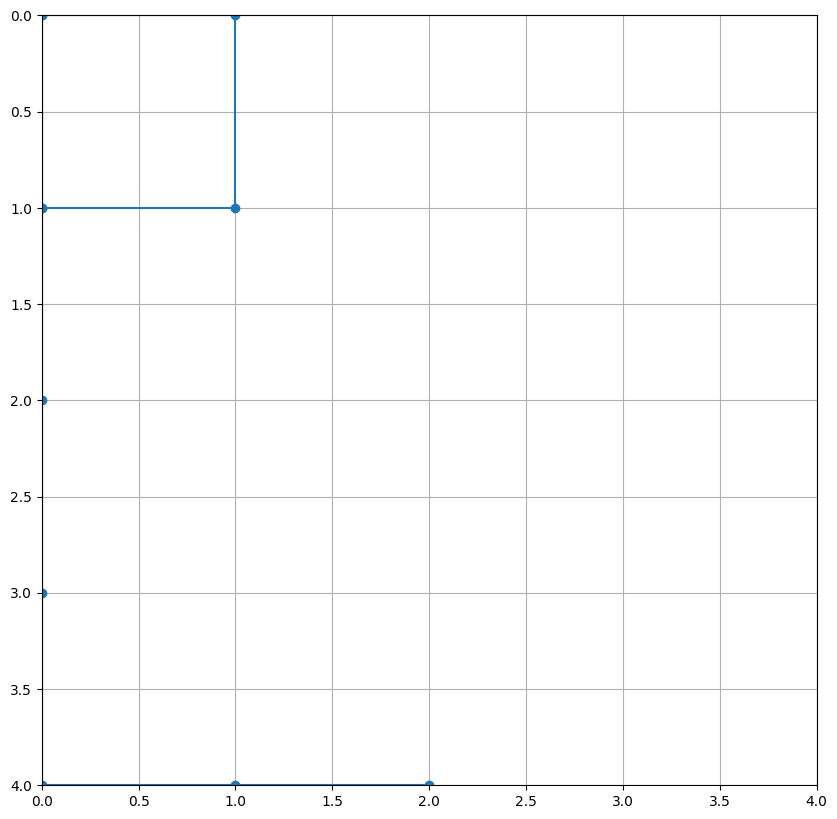

In [28]:
plt.figure(figsize=(10,10))
plt.plot(path_x, path_y, marker = 'o', linestyle='-')
plt.xlim(0, grid_width-1)
plt.ylim(0,grid_height-1)
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()